# Importação de pacotes e definição de funções 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from poke_utils.utils import (list_poke_names, word2vec, cosdis, similarity_word, most_similar)

# Importação dos dados

In [2]:
# dados das figuras
imagens = [mpimg.imread(f'Pokemon Figures/{poke}.png') for poke in list_poke_names()]
# plt.imshow(imagens[0]) # caso precise lembrar/testar

# nomes que serao usados no final
poke_names = pd.read_csv('pokemon_names.csv')

# dados dos tipos principais dos pokemon (1 só)
poke_types = pd.read_csv('pokemon_1_type.csv')

# Tratamento dos dados

In [4]:
# relacionando o dataset de imagens com o de tipos
poke_base = pd.DataFrame({'name_pokes':poke_names['name'], 
                          'name_poke_types':[most_similar(name, poke_types['name'], 
                                                          metric = 'jaro_winkler') for name in poke_names['name']]})

dfinal = poke_base.merge(poke_types, how='inner', left_on='name_poke_types', right_on='name')

# filtrando somente os campos que serão usados
dfinal = dfinal.loc[:, ['name','type']]

# tratando os nomes dos pokemons
dfinal.loc[:,'name'] = [name.split(' ')[0] for name in dfinal.loc[:,'name']]

In [9]:
dados_graf = dfinal.groupby('type').count().reset_index()

Text(0, 0.5, 'Contagem')

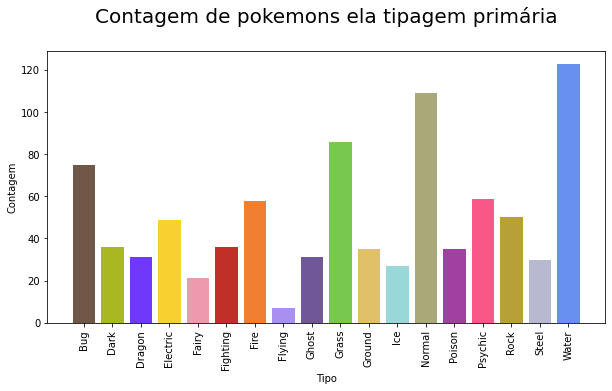

In [54]:
custom_colors = {
    'Bug': '#a8b820',
    'Dark': '#705848',
    'Dragon': '#7038f8',
    'Electric': '#f8d030',
    'Fairy': '#ee99ac',
    'Fighting': '#c03028',
    'Fire': '#f08030',
    'Flying': '#a890f0', 
    'Ghost': '#705898',
    'Grass': '#78c850',
    'Ground': '#e0c068',
    'Ice': '#98d8d8',
    'Normal': '#a8a878',
    'Poison': '#a040a0',
    'Psychic': '#f85888',
    'Rock': '#b8a038',
    'Steel': '#b8b8d0',
    'Water': '#6890f0'}
   
fig, ax = plt.subplots(figsize = [10,5])
plt.bar(x = dados_graf['type'], height = dados_graf['name'], color = custom_colors.values())
plt.title('Contagem de pokemons ela tipagem primária\n', fontsize = 20)
plt.xticks(rotation=90)
ax.set_xlabel('Tipo')
ax.set_ylabel('Contagem')